In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
import pymaid
import matplotlib.font_manager as font_manager
from statannot import add_stat_annotation

#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
#md1 
# 
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1osns=pymaid.get_neuron(MD1OSNs)


#initialize empty list
md1list=[]

#go through the neurons
for n in MD1osns:
    df=pymaid.adjacency_matrix(n, targets=MD1osns)
    sum_recurrent=df.iloc[0].sum()
    md1_list=md1list.append(sum_recurrent)
md1list

Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

[103, 55, 55, 71, 60, 85, 87, 80, 80, 42, 82]

In [3]:
#md2

MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2osns=pymaid.get_neuron(MD2OSNs)


#initialize empty list
md2list=[]

#go through the neurons
for n in MD2osns:
    df=pymaid.adjacency_matrix(n, targets=MD2osns)
    sum_recurrent=df.iloc[0].sum()
    md2_list=md2list.append(sum_recurrent)
md2list

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[10, 15, 16, 9, 16, 13, 9, 9, 21, 5]

dfmd1=dfmd1.set_index("source")
dfmd1.head()

In [4]:
#md3
# 
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3osns=pymaid.get_neuron(MD3OSNs)


#initialize empty list
md3list=[]

#go through the neurons
for n in MD3osns:
    df=pymaid.adjacency_matrix(n, targets=MD3osns)
    sum_recurrent=df.iloc[0].sum()
    md3_list=md3list.append(sum_recurrent)
md3list

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[21, 22, 16, 24, 16, 15, 27, 26, 19, 27]

In [5]:
#make dataframe

data_dict = {"1": md1list, "2": md2list, "3": md3list}
pre_df = {"Glomerulus": [], "Total outgoing OSN→OSN synapses per OSN": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["Total outgoing OSN→OSN synapses per OSN"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,Total outgoing OSN→OSN synapses per OSN
0,1,103
1,1,55
2,1,55
3,1,71
4,1,60
5,1,85
6,1,87
7,1,80
8,1,80
9,1,42


In [6]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

/tmp/ipykernel_7609/3856296730.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.594e-04 U_stat=1.100e+02
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.184e-03 U_stat=9.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.650e-04 U_stat=1.100e+02


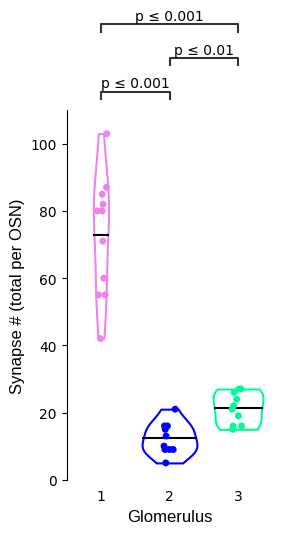

In [10]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "Total outgoing OSN→OSN synapses per OSN"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse # (total per OSN)', size=12, fontname="Liberation Sans")
ax.set_aspect(0.049)
plt.ylim(0,110)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("1", "3"), ("2", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrent_total.svg', format="svg")

plt.show()

In [8]:
kruskal=stats.kruskal(md1list, md2list, md3list)
print(kruskal)

KruskalResult(statistic=24.786885245901647, pvalue=4.145684588463683e-06)


In [9]:
sp.posthoc_dunn([md1list, md2list, md3list], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000002,0.012115
2,0.000002,1.000000,0.129983
3,0.012115,0.129983,1.000000
